### Wyoming opioid risk modeling 
Normal adjacency matrix - Dimentions would be different.

{'DC': ['EP_MUNIT', 'EP_DISABL', 'EP_MINRTY', 'EP_AGE65', 'EP_CROWD'], 'TN': ['EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV'], 'WY': ['EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR']}

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle as pickle
from pylab import *
%matplotlib inline

import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
wySviHepVuRaw = gpd.read_file('./data/processed data/SVI2018 WY counties with death rate HepVu/SVI2018_WY_counties_with_death_rate_HepVu.shp')

##### Filtering the raw variables with overdose death rate

In [4]:
selectedVariables = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ','NOD_Rate']

In [5]:
selectedVariablesWithoutY = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']

In [6]:
selectedVariablesWy = ['FIPS','EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR','geometry']

In [7]:
selectedVariablesWy_ = ['EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR']

#### Simple linear regression model to predict overdose rate

In [22]:
# define x and y
X = wySviHepVuRaw[selectedVariablesWy_]
y = wySviHepVuRaw['NOD_Rate']


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# train a model to predict y from X
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

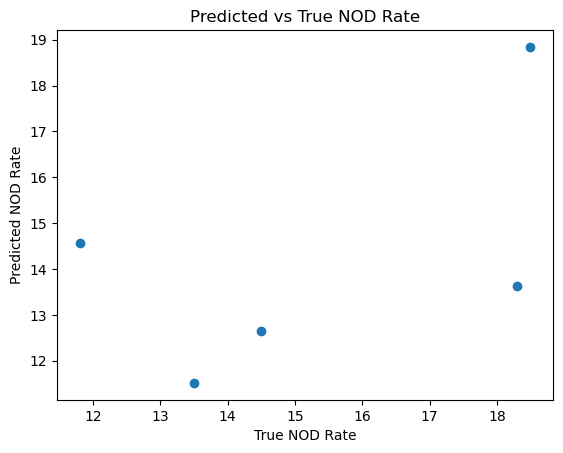

In [29]:
# test the accuracy of the model
from sklearn.metrics import mean_squared_error
y_predicted = model.predict(X_test)

# plot the predicted values against the true values
plt.scatter(y_test, y_predicted)
plt.xlabel('True NOD Rate')
plt.ylabel('Predicted NOD Rate')
plt.title('Predicted vs True NOD Rate')
plt.show()


In [24]:
# predict y from the data
y_pred = model.predict(X)

In [25]:
# include y_pred in the dataframe
wySviHepVuRaw['NOD_Rate_pred'] = y_pred

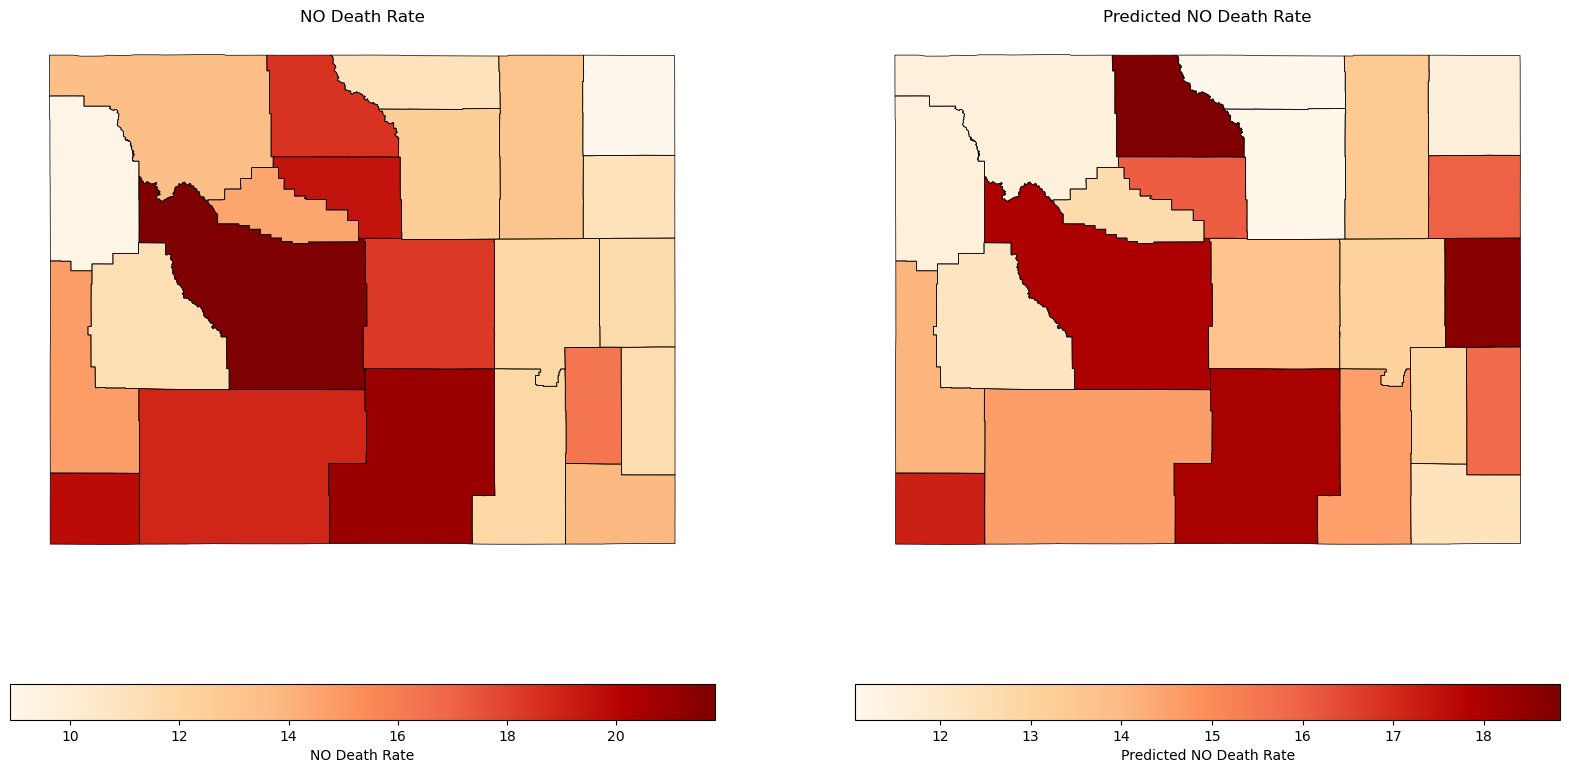

In [26]:
# plot two graphs horizontally NODeath Rate and Predicted NODeath Rate
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
wySviHepVuRaw.plot(column='NOD_Rate', ax=ax[0], legend=True, cmap='OrRd', legend_kwds={'label': "NO Death Rate", 'orientation': "horizontal"})
ax[0].set_title('Death Rate')
ax[0].set_axis_off()
wySviHepVuRaw.boundary.plot(ax=ax[0], color='black', linewidth=0.5)
wySviHepVuRaw.plot(column='NOD_Rate_pred', ax=ax[1], legend=True, cmap='OrRd', legend_kwds={'label': "Predicted NO Death Rate", 'orientation': "horizontal"})
wySviHepVuRaw.boundary.plot(ax=ax[1], color='black', linewidth=0.5)
ax[1].set_title('Predicted Death Rate')
ax[1].set_axis_off()
plt.show()